In [1]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# Load YOLOv8 Nano Pose Model
model = YOLO("yolov8n-pose.pt")  # The Nano variant for pose/keypoint detection

import torch
device = 0 if torch.cuda.is_available() else -1
print(f"Using {'GPU' if device == 0 else 'CPU'}")

# Path to save logs and results
experiment_name = "yolov8n_keypoints"
save_dir = os.path.join("runs", "train", experiment_name)

# Train the model
history = model.train(
    data="data.yaml",  # Path to your custom dataset YAML
    epochs=10,                                # Number of epochs
    imgsz=640,                                # Image size
    batch=10,                                 # Batch size
    name=experiment_name,                     # Experiment name
    device="cpu",                                 # Use GPU (0) or CPU (-1)
    project="runs/train"                      # Directory to save training results
)

# Analyze Results
print("\nTraining Complete!")
print(f"Results saved at: {save_dir}")


KeyboardInterrupt: 


image 1/1 e:\Github\Gun_position_detection\frame_0002.jpg: 384x640 1 LMG, 170.0ms
Speed: 7.0ms preprocess, 170.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Image 1:
Keypoints structure: [[[     403.76      376.53]
  [     358.97      334.68]
  [     406.76      341.71]
  [     386.19      385.93]
  [     423.53      330.24]
  [     369.82      393.05]
  [     383.77      343.87]
  [     372.42      375.89]]]


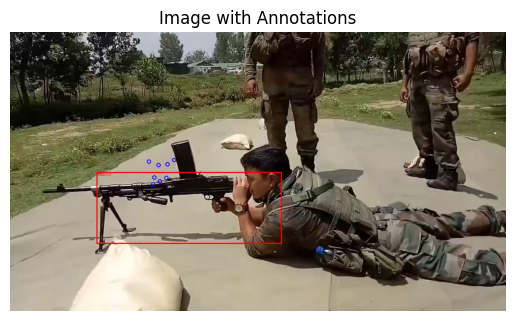

In [34]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

image_path = "frame_0002.jpg"
image = Image.open(image_path)
new_size = (640, 640)  # New width and height (width, height)
resized_image = image.resize(new_size)

# Perform prediction (use your model)
results = model.predict("frame_0002.jpg", conf=0.25, iou=0.5)

# Load the image

# Create a drawing context to annotate the image
draw = ImageDraw.Draw(image)

# Check results structure
if isinstance(results, list):
    for idx, result in enumerate(results):
        print(f"Image {idx + 1}:")
        # Draw bounding boxes and annotations (assuming `result.boxes` exists)
        if hasattr(result, "boxes"):
            for box in result.boxes:  # Iterating through all detections
                # Draw bounding box: (x1, y1, x2, y2)
                x1, y1, x2, y2 = box.xyxy[0]  # Extract box coordinates
                draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
                # Draw label
                label = box.cls[0]  # Assuming class is a label (you can map this to class names)
                draw.text((x1, y1), f"Class {label.item()}", fill="red")

        # Check for pose keypoints and draw them
        if hasattr(result, "keypoints"):
            for keypoints in result.keypoints:
                # Access keypoint coordinates using `.xy`
                keypoints_coords = keypoints.xy.cpu().numpy()  # Convert to numpy array
                
                # Print the structure of keypoints_coords for debugging
                print("Keypoints structure:", keypoints_coords)

                for coord in keypoints_coords[0]:  # Access the inner array containing x, y
                    try:
                        # Extract x, y coordinates
                        x, y = coord[0], coord[1]
                        # Draw keypoints (x, y)
                        draw.ellipse([x - 5, y - 5, x + 5, y + 5], outline="blue", width=2)
                    except ValueError:
                        print(f"Skipping keypoint with unexpected structure: {coord}")

else:
    print("Unexpected results format:", results)

# Display the image with annotations
plt.imshow(image)
plt.title("Image with Annotations")
plt.axis("off")  # Hide axes
plt.show()


In [17]:
# print("Raw pose metrics:", pose_metrics)
# print("Mean results (raw):", pose_metrics.mean_results())


In [37]:
import numpy as np
# Analyze Results
pose_metrics = history.pose  # Pose-specific metrics

print("\nPose Metrics Summary:")
# Accessing mAP@50 and mAP@50-95
print(f"mAP@50 (Pose): {pose_metrics.map50:.3f}")  # Mean AP at IoU 0.50
print(f"mAP@50-95 (Pose): {pose_metrics.map:.3f}")  # Mean AP over IoU 0.50 to 0.95

# Accessing precision and recall
mean_results = pose_metrics.mean_results()  # Retrieve mean metrics

# Handle mean_results depending on its type
if isinstance(mean_results, dict):  # If it's a dictionary
    print(f"Precision (Pose): {mean_results.get('p', 0):.3f}")
    print(f"Recall (Pose): {mean_results.get('r', 0):.3f}")
elif isinstance(mean_results, (list, np.ndarray)):  # If it's a list or array of numerical values
    # Assuming the order is known (e.g., [precision, recall, other metrics...])
    precision = mean_results[0] if len(mean_results) > 0 else 0
    recall = mean_results[1] if len(mean_results) > 1 else 0
    print(f"Precision (Pose): {precision:.3f}")
    print(f"Recall (Pose): {recall:.3f}")
else:
    print("Unexpected format for mean_results:", mean_results)



Pose Metrics Summary:
mAP@50 (Pose): 0.000
mAP@50-95 (Pose): 0.000
Precision (Pose): 0.000
Recall (Pose): 0.000


In [38]:
# Inspect the results object to see its contents
print(results)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'LMG'}
obb: None
orig_img: array([[[ 22,  22,  22],
        [ 26,  26,  26],
        [ 20,  20,  20],
        ...,
        [ 14,  29,  32],
        [ 15,  30,  33],
        [ 15,  30,  33]],

       [[ 29,  29,  29],
        [ 26,  26,  26],
        [ 30,  30,  30],
        ...,
        [ 14,  29,  32],
        [ 14,  29,  32],
        [ 14,  29,  32]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 32,  32,  32],
        ...,
        [ 14,  29,  32],
        [ 14,  29,  32],
        [ 14,  29,  32]],

       ...,

       [[164, 180, 187],
        [164, 180, 187],
        [164, 180, 187],
        ...,
        [137, 155, 162],
        [137, 155, 162],
        [137, 155, 162]],

       [[164, 180, 187],
        [164, 180, 187],
        [164, 180, 187],
        ...,
        [137, 155, 162],
 

In [40]:
import matplotlib.pyplot as plt
import os

# Path to save logs and results
save_dir = "runs"

# Assuming `results.pose` contains mAP scores and loss data
try:
    # Access the first result (if you have multiple results)
    first_result = history[0]

    # Plot loss curves for box, objectness, classification (if available)
    if hasattr(first_result, 'box') and hasattr(first_result.box, 'loss'):
        plt.figure(figsize=(10, 6))
        plt.plot(first_result.box.loss.train, label="Box Training Loss")
        plt.plot(first_result.box.loss.val, label="Box Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss (Box)")
        plt.legend()
        plt.grid()
        plt.savefig(os.path.join(save_dir, "loss_curve_box.png"))
        plt.show()

    # Plot mAP curves for Pose
    if hasattr(first_result.pose, 'metrics'):
        pose_metrics = first_result.pose.metrics
        plt.figure(figsize=(10, 6))

        # Accessing mAP@50 and mAP@50-95 from metrics
        plt.plot(pose_metrics.map50, label="Pose mAP@50")
        plt.plot(pose_metrics.map, label="Pose mAP@50-95")

        plt.xlabel("Epochs")
        plt.ylabel("mAP")
        plt.title("Mean Average Precision (Pose)")
        plt.legend()
        plt.grid()
        plt.savefig(os.path.join(save_dir, "map_curve_pose.png"))
        plt.show()

except Exception as e:
    print("Error during plotting:", e)


Error during plotting: 'PoseMetrics' object is not subscriptable


In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='black')

plt.plot(history.history['val_loss'],color='red')

AttributeError: 'PoseMetrics' object has no attribute 'history'. See valid attributes below.

    Calculates and aggregates detection and pose metrics over a given set of classes.

    Args:
        save_dir (Path): Path to the directory where the output plots should be saved. Default is the current directory.
        plot (bool): Whether to save the detection and segmentation plots. Default is False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (list): List of class names. Default is an empty list.

    Attributes:
        save_dir (Path): Path to the directory where the output plots should be saved.
        plot (bool): Whether to save the detection and segmentation plots.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (list): List of class names.
        box (Metric): An instance of the Metric class to calculate box detection metrics.
        pose (Metric): An instance of the Metric class to calculate mask segmentation metrics.
        speed (dict): Dictionary to store the time taken in different phases of inference.

    Methods:
        process(tp_m, tp_b, conf, pred_cls, target_cls): Processes metrics over the given set of predictions.
        mean_results(): Returns the mean of the detection and segmentation metrics over all the classes.
        class_result(i): Returns the detection and segmentation metrics of class `i`.
        maps: Returns the mean Average Precision (mAP) scores for IoU thresholds ranging from 0.50 to 0.95.
        fitness: Returns the fitness scores, which are a single weighted combination of metrics.
        ap_class_index: Returns the list of indices of classes used to compute Average Precision (AP).
        results_dict: Returns the dictionary containing all the detection and segmentation metrics and fitness score.
    

In [42]:
print(history.pose.metrics)



AttributeError: 'Metric' object has no attribute 'metrics'. See valid attributes below.

    Class for computing evaluation metrics for YOLOv8 model.

    Attributes:
        p (list): Precision for each class. Shape: (nc,).
        r (list): Recall for each class. Shape: (nc,).
        f1 (list): F1 score for each class. Shape: (nc,).
        all_ap (list): AP scores for all classes and all IoU thresholds. Shape: (nc, 10).
        ap_class_index (list): Index of class for each AP score. Shape: (nc,).
        nc (int): Number of classes.

    Methods:
        ap50(): AP at IoU threshold of 0.5 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        ap(): AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        mp(): Mean precision of all classes. Returns: Float.
        mr(): Mean recall of all classes. Returns: Float.
        map50(): Mean AP at IoU threshold of 0.5 for all classes. Returns: Float.
        map75(): Mean AP at IoU threshold of 0.75 for all classes. Returns: Float.
        map(): Mean AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: Float.
        mean_results(): Mean of results, returns mp, mr, map50, map.
        class_result(i): Class-aware result, returns p[i], r[i], ap50[i], ap[i].
        maps(): mAP of each class. Returns: Array of mAP scores, shape: (nc,).
        fitness(): Model fitness as a weighted combination of metrics. Returns: Float.
        update(results): Update metric attributes with new evaluation results.
    